# Introduction
___
* Linear regression modeling in this notebook

In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cleaned_mlb.csv')

In [3]:
print(df.shape)
df.head()

(810, 51)


,rank,games_behind,night_game,attendance,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN
0,-1.88,1.13,-1.41,41245.00,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
1,-0.04,0.99,0.71,38863.00,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
2,0.89,0.99,0.71,25982.00,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37
3,-0.96,0.99,0.71,28055.00,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71
4,0.89,0.86,-1.41,33044.00,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71


In [210]:
df.attendance.mean()

29996.107407407406

In [165]:
# split the set in a 8:2 seasons ratio
train_set = df[:729]
test_set = df[729:]

## Train-Test Split
___

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [172]:
target = train_set['attendance']
features = train_set.drop(columns= 'attendance')

In [173]:
features.shape

(729, 50)

In [174]:
print('Average attendance for 8 seasons is:', int(target.mean()))
target.shape

Average attendance for 8 seasons is: 29937


(729,)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=9,test_size=0.20)

In [176]:
X_train.shape

(583, 50)

## Modelling Process
____

### Dummy Regressor

In [177]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()

In [178]:
dummy.fit(X_train, y_train)

dummy_preds_test = dummy.predict(X_test)

dummy_test_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds_test))

print('Testing RMSE:' , int(dummy_test_rmse))

Testing RMSE: 5987


## Linear Regression

In [179]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
#evaluate the predictions on the test examples
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Training RMSE:' , int(train_rmse))
print('Testing RMSE:' , int(test_rmse))

Training RMSE: 4561
Testing RMSE: 4763


In [180]:
rmse_dict = {'Linear Regression': test_rmse}
rmse_dict

{'Linear Regression': 4763.057814075711}

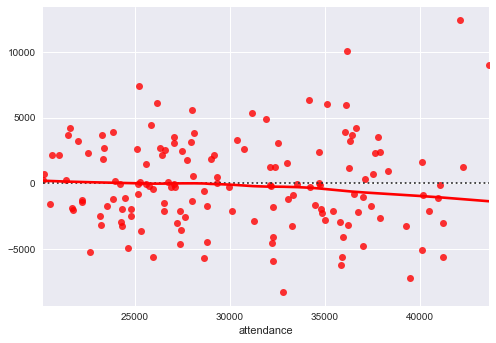

In [181]:
sns.residplot( y_test, y_test_pred,lowess=True, color= 'red')
plt.show()

### K-Best Model

In [182]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=25)

selector.fit(X_train, y_train)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [183]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [184]:
print(removed_columns)

Index(['streak', 'Aug', 'May', 'ARI', 'BAL', 'CHC', 'CHW', 'CLE', 'COL', 'DET',
       'FLA', 'HOU', 'KCR', 'MIL', 'MIN', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG',
       'STL', 'TBR', 'TEX', 'TOR', 'WSN'],
      dtype='object')


In [185]:
print(selected_columns)

Index(['rank', 'games_behind', 'night_game', 'cli', 'games_left-games_behind',
       'weekend', 'weekend_x_night', 'Apr', 'Jul', 'Jun', 'Mar', 'Oct', 'Sep',
       'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'ATL', 'BOS',
       'CIN', 'LAA', 'LAD', 'MIA', 'NYY'],
      dtype='object')


In [186]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4657
Testing RMSE: 4691


In [187]:
print('Testing MAE:' , int(mean_absolute_error(y_test, test_kbest)))

Testing MAE: 3815


In [188]:
rmse_dict['k-Best'] = testK_rmse
rmse_dict

{'Linear Regression': 4763.057814075711, 'k-Best': 4691.093170985697}

## Polynomial Features


In [189]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(features)
poly2_columns = poly_2.get_feature_names(features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,rank,games_behind,night_game,cli,streak,games_left-games_behind,weekend,weekend_x_night,Apr,Aug,Jul,Jun,Mar,May,Oct,Sep,Friday,Monday,Thursday,Tuesday,Wednesday,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,DET,FLA,HOU,KCR,LAA,LAD,MIA,MIL,MIN,NYY,OAK,PHI,PIT,SDP,SFG,STL,TBR,TEX,TOR,WSN,...,OAK STL,OAK TBR,OAK TEX,OAK TOR,OAK WSN,PHI^2,PHI PIT,PHI SDP,PHI SFG,PHI STL,PHI TBR,PHI TEX,PHI TOR,PHI WSN,PIT^2,PIT SDP,PIT SFG,PIT STL,PIT TBR,PIT TEX,PIT TOR,PIT WSN,SDP^2,SDP SFG,SDP STL,SDP TBR,SDP TEX,SDP TOR,SDP WSN,SFG^2,SFG STL,SFG TBR,SFG TEX,SFG TOR,SFG WSN,STL^2,STL TBR,STL TEX,STL TOR,STL WSN,TBR^2,TBR TEX,TBR TOR,TBR WSN,TEX^2,TEX TOR,TEX WSN,TOR^2,TOR WSN,WSN^2
0,-1.88,1.13,-1.41,0.73,0.40,1.68,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,2.96,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
1,-0.04,0.99,0.71,0.84,-0.39,1.64,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,2.36,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
2,0.89,0.99,0.71,0.60,-0.78,1.62,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,2.68,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,6.63,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,-0.37,...,0.02,0.01,0.01,0.01,0.04,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,0.13,0.04,0.04,0.04,0.04,0.01,0.02,0.01,0.08,0.04,0.04,0.04,0.01,0.02,0.01,0.07,0.04,0.04,0.01,0.02,0.01,0.08,0.05,0.01,0.02,0.01,0.08,0.00,0.00,0.00,0.02,0.01,0.01,0.03,0.00,0.03,0.14
3,-0.96,0.99,0.71,0.54,0.40,1.60,-0.69,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,2.35,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34
4,0.89,0.86,-1.41,0.69,-0.39,1.57,1.45,-0.36,2.29,-0.47,-0.42,-0.41,-0.06,-0.46,-0.09,-0.46,-0.42,-0.34,-0.37,-0.41,-0.42,-0.21,-0.36,-0.09,-0.06,-0.21,-0.08,-0.21,-0.06,-0.21,-0.11,-0.15,-0.12,-0.08,-0.09,-0.20,-0.32,-0.20,-0.10,-0.18,-0.10,-0.36,-0.21,-0.20,-0.21,-0.21,-0.06,-0.08,-0.07,2.71,...,0.02,0.01,0.01,0.01,-0.27,0.13,0.07,0.07,0.07,0.08,0.02,0.03,0.03,-0.97,0.04,0.04,0.04,0.04,0.01,0.02,0.01,-0.57,0.04,0.04,0.04,0.01,0.02,0.01,-0.55,0.04,0.04,0.01,0.02,0.01,-0.56,0.05,0.01,0.02,0.01,-0.58,0.00,0.00,0.00,-0.17,0.01,0.01,-0.21,0.00,-0.19,7.34


In [190]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

### Polynomial: Lasso Model


In [191]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.001, normalize=False, max_iter=100000, )

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_lasso01 = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training RMSE:', int(train_rmse_lasso01) )
print('Testing RMSE:', int(test_rmse_lasso01) )

Training RMSE: 2029
Testing RMSE: 42548


/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189079684.3947172, tolerance: 2297650.7372428817
  model = cd_fast.enet_coordinate_descent(


In [192]:
rmse_dict['Poly-Lasso'] = test_rmse_lasso01
rmse_dict

{'Linear Regression': 4763.057814075711,
 'k-Best': 4691.093170985697,
 'Poly-Lasso': 42548.69761111952}

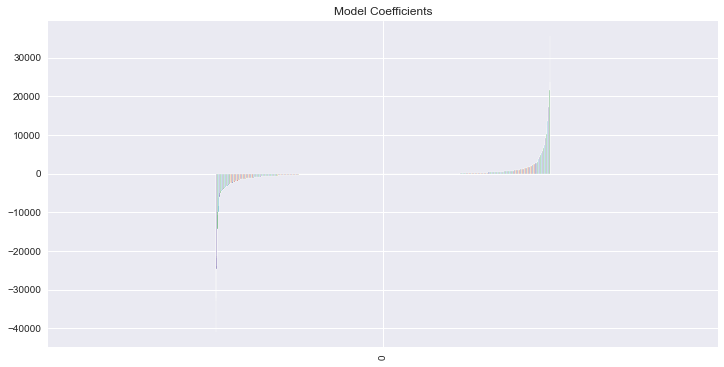

In [193]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(12,6))
plt.show()

### Polynomial: K-Best Model

In [194]:
selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fa837351790>)

In [195]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [196]:
print(removed_columns)

Index(['night_game', 'streak', 'games_left-games_behind', 'Apr', 'Aug', 'Jul',
       'Jun', 'Mar', 'May', 'Oct',
       ...
       'TBR^2', 'TBR TEX', 'TBR TOR', 'TBR WSN', 'TEX^2', 'TEX TOR', 'TEX WSN',
       'TOR^2', 'TOR WSN', 'WSN^2'],
      dtype='object', length=1295)


In [197]:
print(selected_columns)

Index(['rank', 'games_behind', 'cli', 'weekend', 'weekend_x_night', 'NYY',
       'rank CLE', 'games_behind games_left-games_behind', 'games_behind CLE',
       'night_game weekend_x_night', 'cli games_left-games_behind', 'cli CLE',
       'weekend^2', 'weekend Friday', 'weekend CLE', 'weekend_x_night^2',
       'weekend_x_night Friday', 'weekend_x_night CLE', 'Apr NYY',
       'Tuesday Wednesday', 'ARI NYY', 'ATL NYY', 'CHC NYY', 'CLE NYY',
       'COL NYY', 'LAD NYY', 'NYY^2', 'NYY PHI', 'NYY STL', 'NYY WSN'],
      dtype='object')


In [198]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)  #fit the linear regression to the data

train_kbest = lm_kbest.predict(X_train[selected_columns])  # predict on the train and test k-best
test_kbest = lm_kbest.predict(X_test[selected_columns])

trainK_rmse = np.sqrt(mean_squared_error(y_train, train_kbest))  # calculate the train-test RMSE
testK_rmse = np.sqrt(mean_squared_error(y_test, test_kbest))

print('Training RMSE:' , int(trainK_rmse))
print('Testing RMSE:' , int(testK_rmse))

Training RMSE: 4788
Testing RMSE: 4719


In [199]:
rmse_dict['Poly-K-Best'] = testK_rmse
rmse_dict['Dummy Regressor'] = dummy_test_rmse
rmse_dict

{'Linear Regression': 4763.057814075711,
 'k-Best': 4691.093170985697,
 'Poly-Lasso': 42548.69761111952,
 'Poly-K-Best': 4719.733960869721,
 'Dummy Regressor': 5987.977955628345}

In [200]:
rmse_df = pd.DataFrame(rmse_dict.values(), columns=['RMSE'], index = rmse_dict.keys())
rmse_df.sort_values(by='RMSE')

,RMSE
k-Best,4691.09
Poly-K-Best,4719.73
Linear Regression,4763.06
Dummy Regressor,5987.98
Poly-Lasso,42548.70


## Fit The Best Model On The Entire Train Set And The Holdout Set
___

In [201]:
selector = SelectKBest(f_regression, k=25)

selector.fit(features, target)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [202]:
selected_columns = features.columns[selector.get_support()]
removed_columns = features.columns[~selector.get_support()]

In [203]:
lm_kbest = LinearRegression()

lm_kbest.fit(features[selected_columns], target)

full_train_kbest = lm_kbest.predict(features[selected_columns])  # predict on the train and test k-best

full_trainK_rmse = np.sqrt(mean_squared_error(target, full_train_kbest))  # calculate the train-test RMSE

print('Training RMSE:' , int(full_trainK_rmse))

Training RMSE: 4647


### Predicting the Holdout

In [204]:
test_target = test_set['attendance']

test_features = test_set.drop(columns='attendance')

In [205]:
selector.fit(test_features, test_target)

/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/farhan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=25, score_func=<function f_regression at 0x7fa837351790>)

In [206]:
selected_columns = features.columns[selector.get_support()]
removed_columns = features.columns[~selector.get_support()]

In [207]:
lm_kbest = LinearRegression()

lm_kbest.fit(test_features[selected_columns], test_target)

holdout_kbest = lm_kbest.predict(test_features[selected_columns])  # predict on the train and test k-best

holdoutK_rmse = np.sqrt(mean_squared_error(test_target, holdout_kbest))  # calculate the train-test RMSE

print('Testing RMSE:' , int(holdoutK_rmse))
print('Testing MAE:', int(mean_absolute_error(test_target, holdout_kbest)))

Testing RMSE: 2947
Testing MAE: 2119


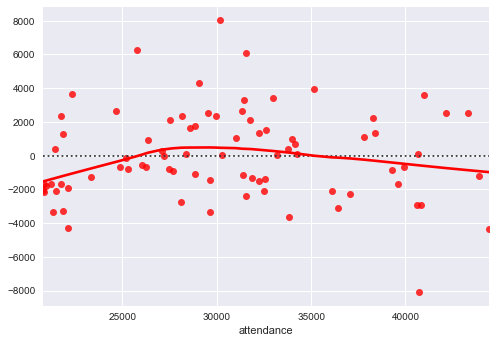

In [208]:
sns.residplot(test_target, holdout_kbest, lowess=True, color= 'red')
plt.show()

In [160]:
print(lm_kbest.coef_[24])
print(test_features.columns[24])

-189.07263467610676
BOS
